# ANALISIS ESTADISTICO DE DATASET : ECOMMERCE CHURN


Dataset : [E-commerce Customer Churn
](https://www.kaggle.com/datasets/samuelsemaya/e-commerce-customer-churn)

# PASO 1 : IMPORTAMOS LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# PASO 2 : CARGAMOS DATASET

In [ ]:
data_df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')
data_df.head(2)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0


# PASO 3 - ANALISIS EXPLORATORIO DE DATOS(EDA)

## TIPOS DE DATOS

In [ ]:
data_df.dtypes

,0
Tenure,float64
WarehouseToHome,float64
NumberOfDeviceRegistered,int64
PreferedOrderCat,object
SatisfactionScore,int64
MaritalStatus,object
NumberOfAddress,int64
Complain,int64
DaySinceLastOrder,float64
CashbackAmount,float64


## CONTEO POR TIPO DE DATOS

In [ ]:
data_df.dtypes.value_counts()

,count
int64,5
float64,4
object,2


## TAMAÑO DEL DATASET(FILAS Y COLUMNAS)

In [ ]:
data_df.shape

(3941, 11)

# PASO 4 - TRATAMIENTO DE DATOS FALTANTES

## EJECUTAMOS FUNCIONES MISSING

In [ ]:
%run '/content/pandas_missing_extension.ipynb'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24814 sha256=2f12250989c60e2a463342873bf3626c3de37351a985fe745a24253557b12fb3
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [ ]:
data_df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')
data_df.head(2)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0


In [ ]:
data_df.size

43351

In [ ]:
data_df.missing.number_complete()

42775

In [ ]:
data_df.missing.number_missing()

576

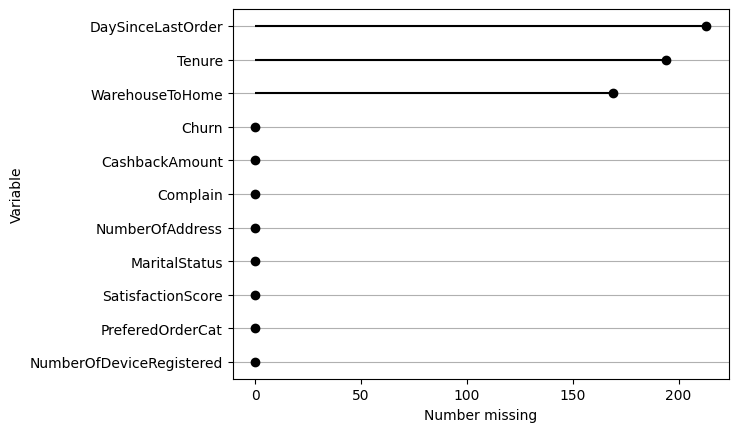

In [ ]:
data_df.missing.missing_variable_plot()

## CLASIFICAMOS EL TIPO DE FALTANTES

In [ ]:
import missingno

<Axes: >

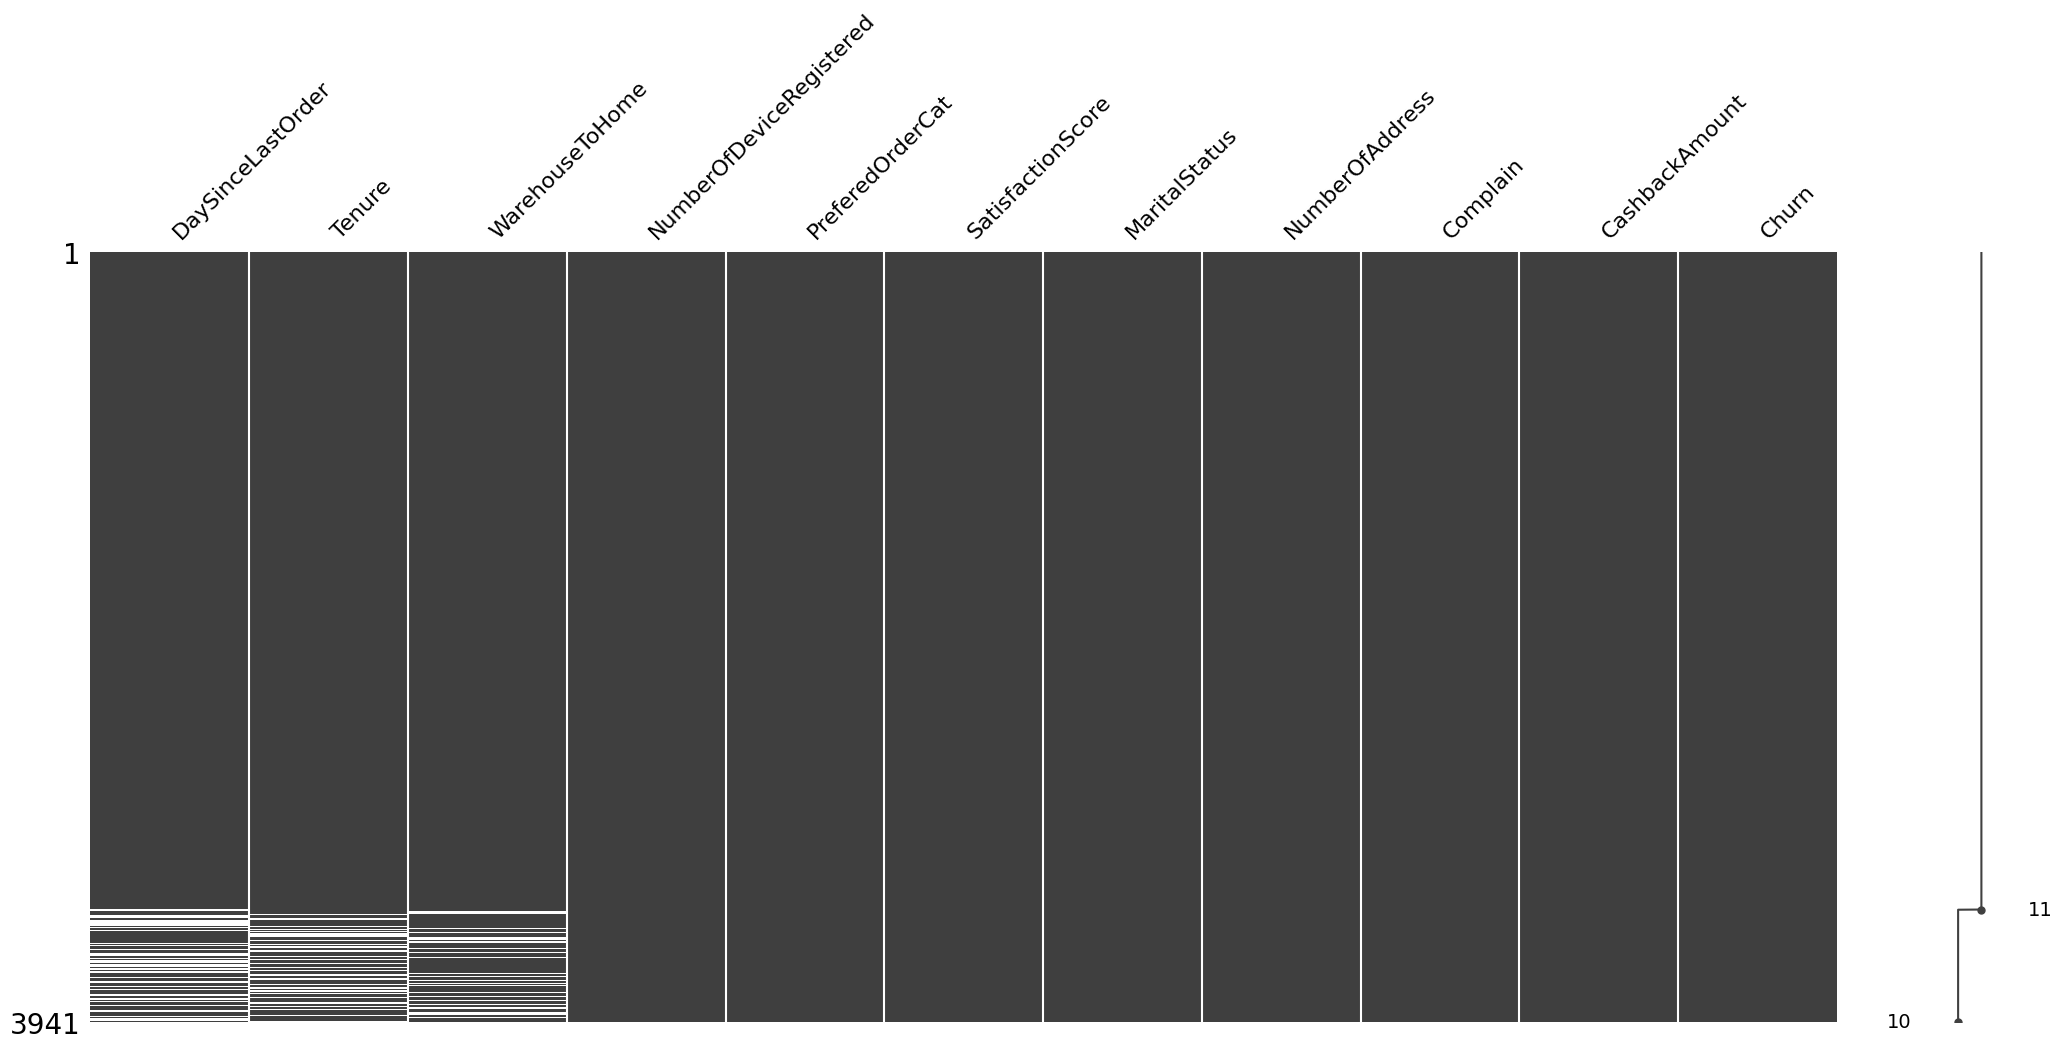

In [ ]:
(
    data_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix,sort="descending")
)

## IMPUTACIÓN DE DATOS FALTANTES

In [ ]:
data_df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [ ]:
data_df.DaySinceLastOrder.describe()

,DaySinceLastOrder
count,3728.000000
mean,4.531652
std,3.667648
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,46.000000


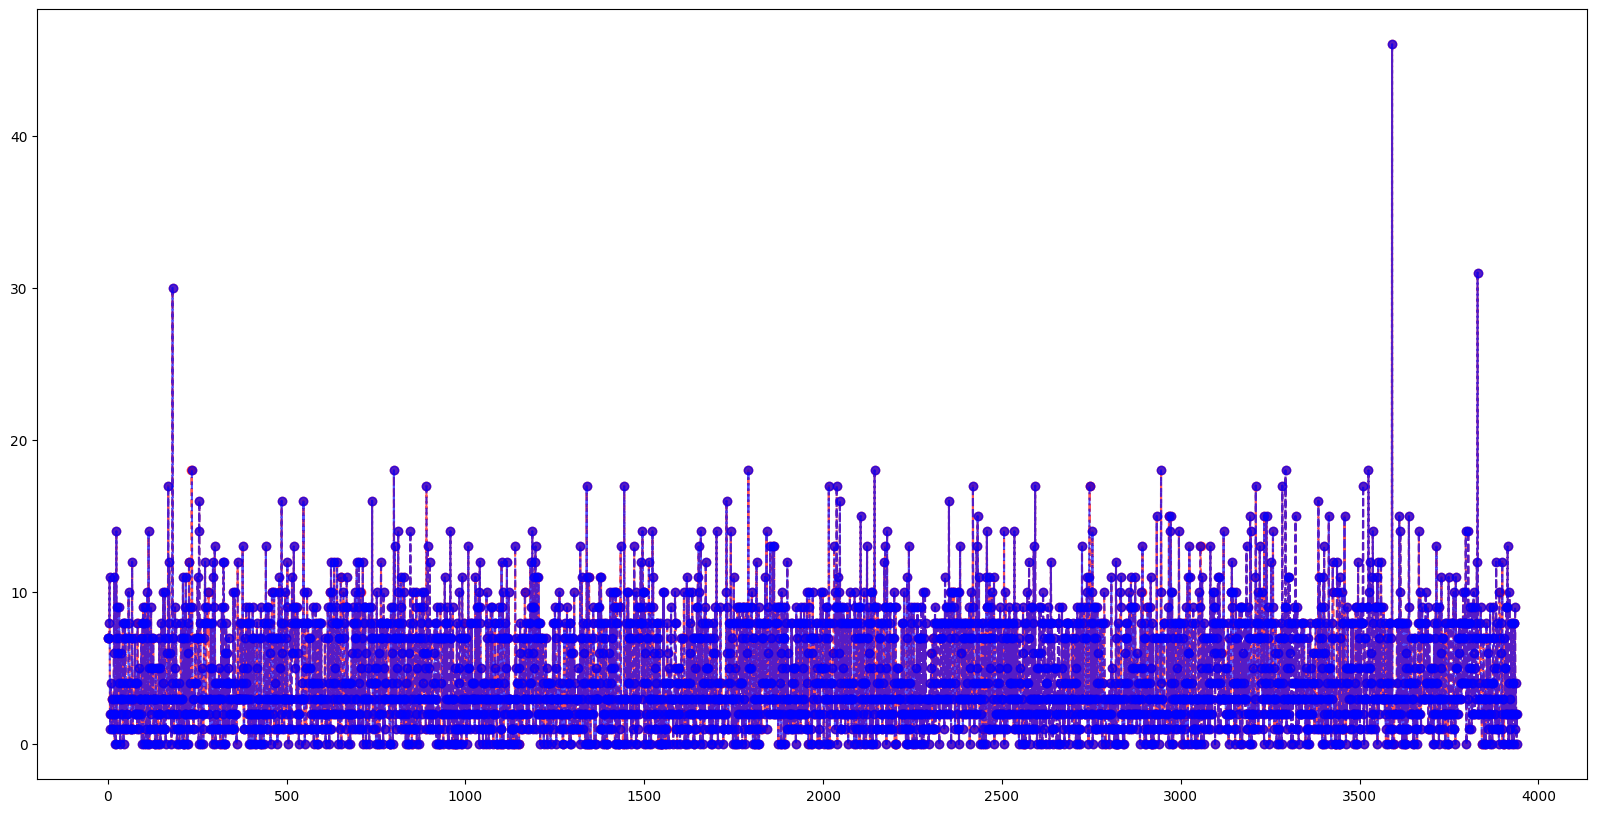

In [ ]:
plt.figure(figsize=(20,10))
data_df['DaySinceLastOrder'].interpolate(method='nearest').plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
data_df['DaySinceLastOrder'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
plt.show()


In [ ]:
data_daysincelastorder_df = data_df
data_daysincelastorder_df['DaySinceLastOrder'].interpolate(method='nearest',limit_direction='both', inplace=True)
data_daysincelastorder_df['DaySinceLastOrder'].isna().sum()

<ipython-input-41-1ed331162bb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_daysincelastorder_df['DaySinceLastOrder'].interpolate(method='nearest',limit_direction='both', inplace=True)


0

In [ ]:
data_df['DaySinceLastOrder'].isna().sum()

0

In [ ]:
data_df.DaySinceLastOrder.describe()

,DaySinceLastOrder
count,3941.000000
mean,4.528546
std,3.661226
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,46.000000


In [ ]:
data_daysincelastorder_df['DaySinceLastOrder'].describe()

,DaySinceLastOrder
count,3941.000000
mean,4.528546
std,3.661226
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,46.000000


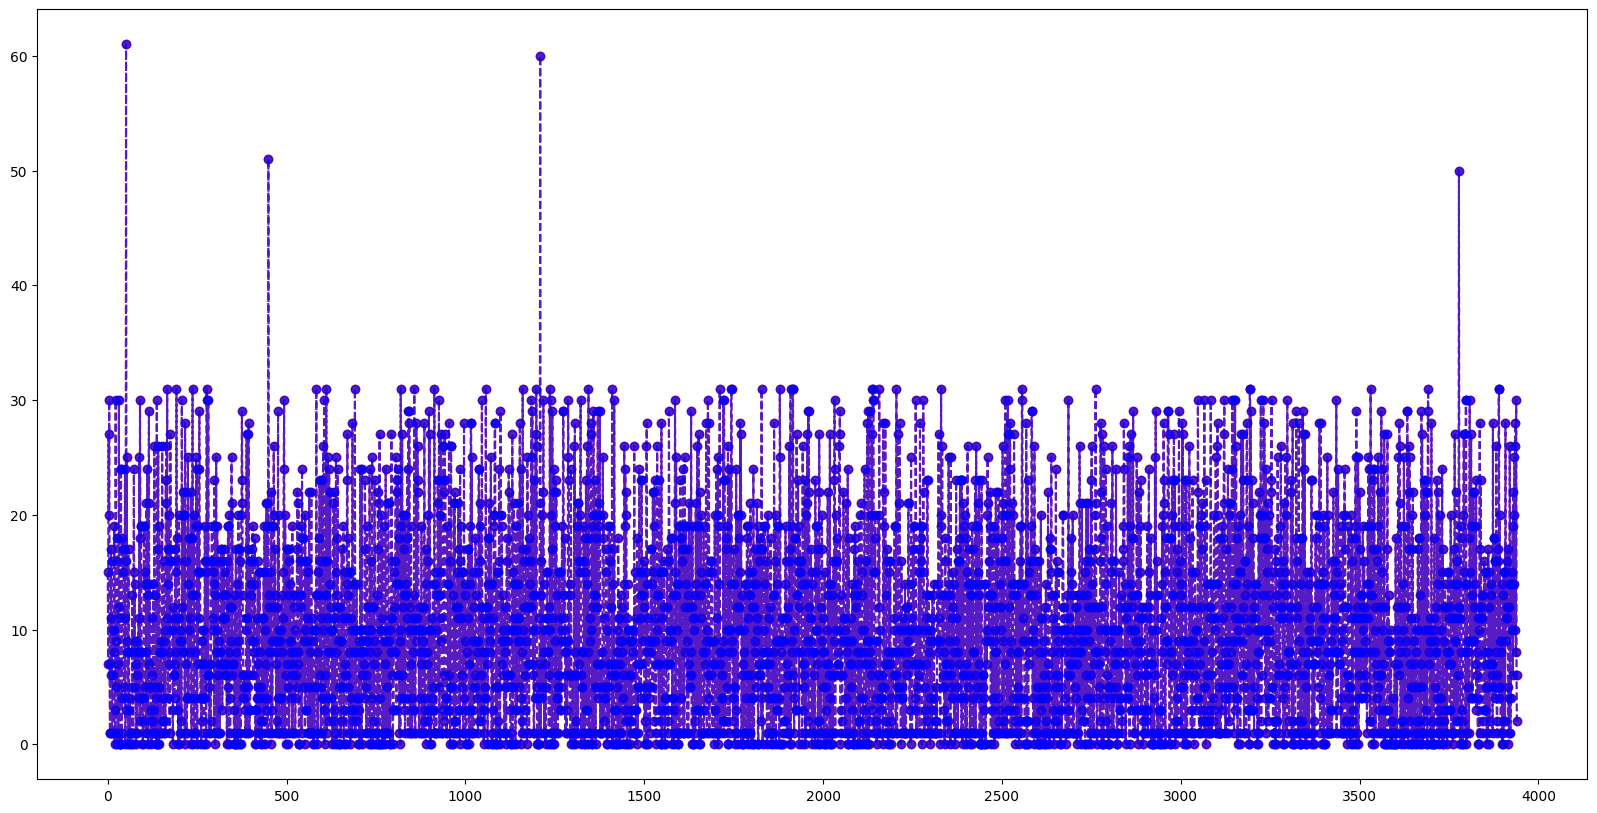

In [ ]:
plt.figure(figsize=(20,10))
data_df['Tenure'].interpolate(method='nearest').plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
data_df['Tenure'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
plt.show()

In [ ]:
data_df['Tenure'].interpolate(method='nearest',limit_direction='both',inplace=True)
data_df['Tenure'].isna().sum()

0

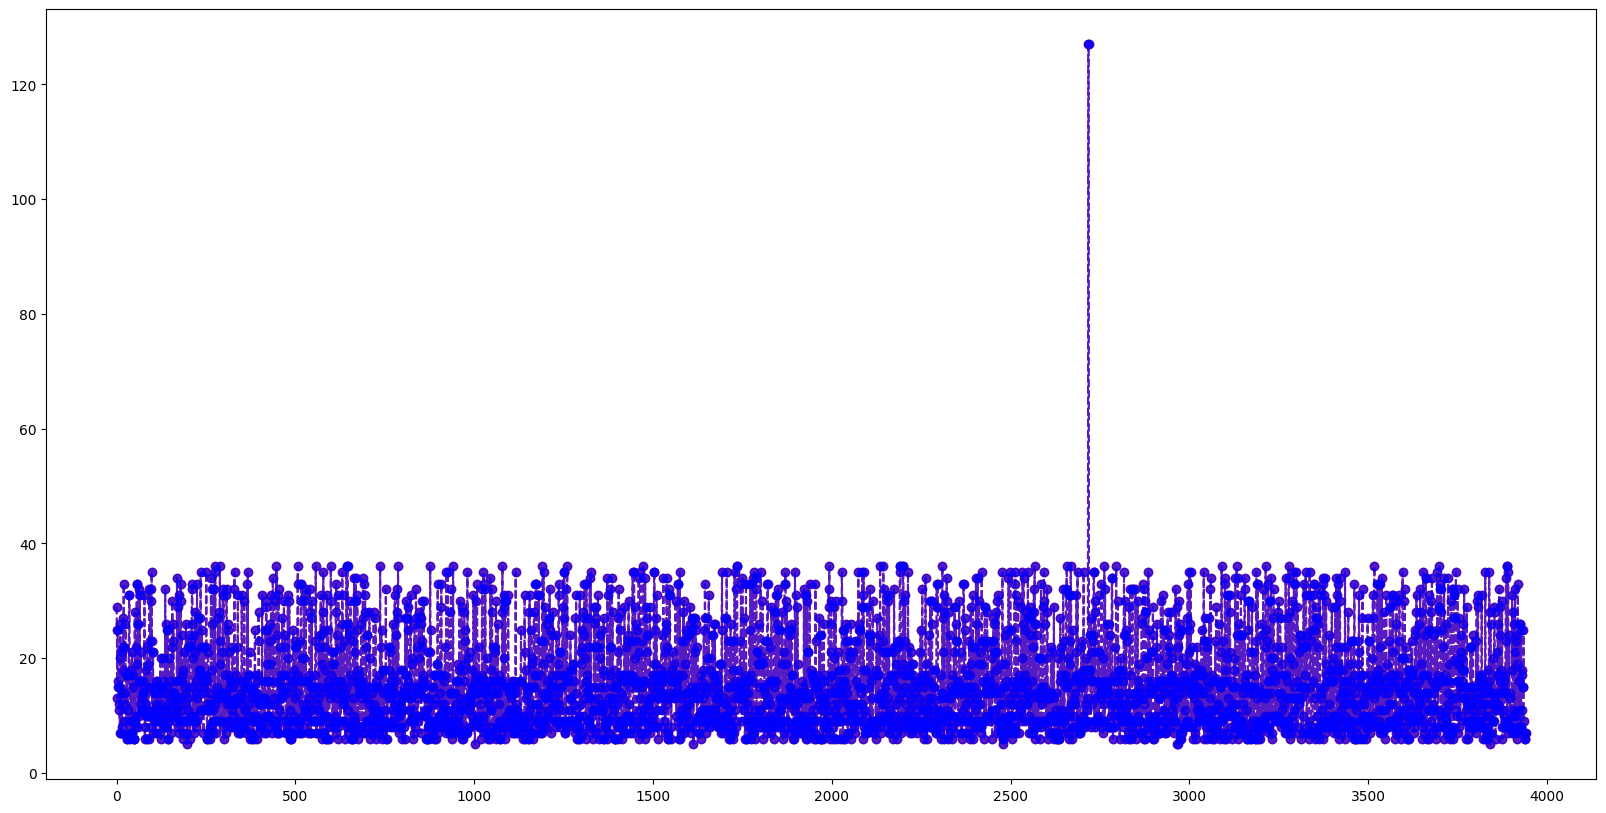

In [ ]:
plt.figure(figsize=(20,10))
data_df['WarehouseToHome'].interpolate(method='nearest').plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
data_df['WarehouseToHome'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
plt.show()

In [ ]:
data_df['WarehouseToHome'].interpolate(method='nearest',limit_direction='both',inplace=True)
data_df['WarehouseToHome'].isna().sum()

0

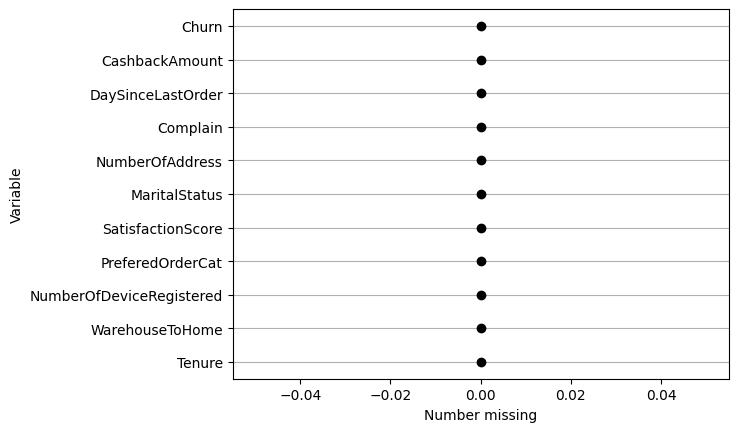

In [ ]:
data_df.missing.missing_variable_plot()

# PASO 5 - CODIFICACION DE VARIABLES CATEGORICAS

# LIMPIEZA DE COLUMNAS(VARIABLES)

In [ ]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.2/205.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
data_df = (
    data_df.clean_names(case_type='snake')
)
data_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tenure,warehouse_to_home,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,day_since_last_order,cashback_amount,churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,7.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,6.0,4,Mobile,3,Married,10,1,0.0,124.37,1


In [ ]:
categorical_columns = data_df.select_dtypes(object).columns
categorical_columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['prefered_order_cat', 'marital_status'], dtype='object')

In [ ]:
data_df.prefered_order_cat.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
prefered_order_cat,
Laptop & Accessory,1458
Mobile Phone,887
Fashion,585
Mobile,559
Grocery,273
Others,179


In [ ]:
data_df.marital_status.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
marital_status,
Married,2055
Single,1310
Divorced,576


## CREO UN TRANSFOMER

In [ ]:
import sklearn.compose
import sklearn.preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),categorical_columns),
    remainder="passthrough"
)
categorical_transformer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['prefered_order_cat', 'marital_status'], dtype='object'))])

## APLICO EL TRANSFOMER A MIS VARIABLES CATEGORICAS

In [ ]:
data_transformerd_df = (
    pd.DataFrame(
        categorical_transformer.fit_transform(data_df),
        columns = categorical_transformer.get_feature_names_out(),
        index= data_df.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix("ordinalencoder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("remainder__")
    )
)
data_transformerd_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,prefered_order_cat,marital_status,tenure,warehouse_to_home,number_of_device_registered,satisfaction_score,number_of_address,complain,day_since_last_order,cashback_amount,churn
0,2.0,2.0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0
1,3.0,1.0,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0
2,2.0,1.0,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0
3,0.0,0.0,20.0,25.0,4.0,3.0,7.0,0.0,7.0,230.27,0.0
4,5.0,2.0,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3936,0.0,1.0,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,0.0
3937,4.0,2.0,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0
3938,2.0,1.0,30.0,6.0,5.0,3.0,3.0,1.0,2.0,156.60,0.0
3939,3.0,1.0,6.0,6.0,4.0,3.0,10.0,1.0,0.0,124.37,1.0


# PASO 6 - ANALISIS ESTADISTICO

## CORRELACIONES

In [ ]:
data_transformerd_df.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,prefered_order_cat,marital_status,tenure,warehouse_to_home,number_of_device_registered,satisfaction_score,number_of_address,complain,day_since_last_order,cashback_amount,churn
prefered_order_cat,1.000000,0.045771,-0.169462,-0.075983,0.040825,0.010694,-0.082490,-0.004806,-0.177810,-0.273996,0.124886
marital_status,0.045771,1.000000,-0.080785,-0.014297,0.039602,-0.037713,-0.008340,-0.000248,-0.045148,-0.077380,0.142085
tenure,-0.169462,-0.080785,1.000000,-0.015457,-0.028106,-0.036327,0.207122,-0.025891,0.150532,0.435243,-0.340387
warehouse_to_home,-0.075983,-0.014297,-0.015457,1.000000,0.012900,0.008766,-0.005390,0.023588,0.008731,-0.008333,0.063310
number_of_device_registered,0.040825,0.039602,-0.028106,0.012900,1.000000,-0.005504,0.077813,0.013885,0.007390,0.128373,0.108464
satisfaction_score,0.010694,-0.037713,-0.036327,0.008766,-0.005504,1.000000,0.047638,-0.033975,0.033064,-0.006496,0.107541
number_of_address,-0.082490,-0.008340,0.207122,-0.005390,0.077813,0.047638,1.000000,-0.005070,-0.055060,0.182821,0.039195
complain,-0.004806,-0.000248,-0.025891,0.023588,0.013885,-0.033975,-0.005070,1.000000,-0.049159,0.010934,0.261450
day_since_last_order,-0.177810,-0.045148,0.150532,0.008731,0.007390,0.033064,-0.055060,-0.049159,1.000000,0.324866,-0.144921
cashback_amount,-0.273996,-0.077380,0.435243,-0.008333,0.128373,-0.006496,0.182821,0.010934,0.324866,1.000000,-0.161535


In [ ]:
data_transformerd_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['prefered_order_cat', 'marital_status', 'tenure', 'warehouse_to_home',
       'number_of_device_registered', 'satisfaction_score',
       'number_of_address', 'complain', 'day_since_last_order',
       'cashback_amount', 'churn'],
      dtype='object')

In [ ]:
selected_columns = ['prefered_order_cat', 'marital_status', 'complain', 'churn']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

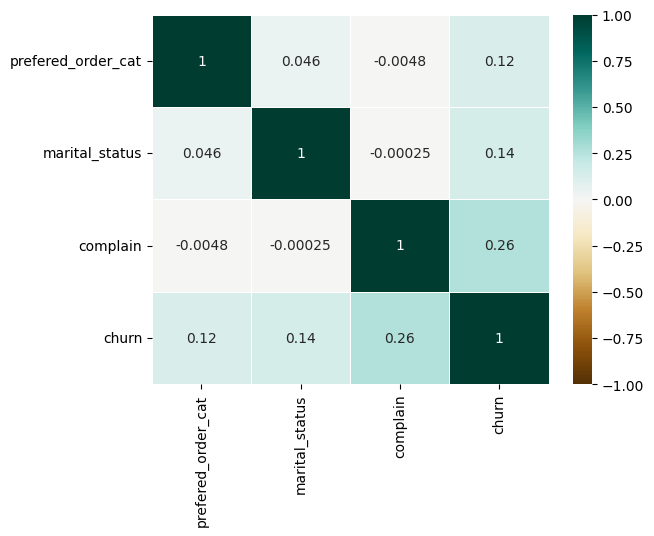

In [ ]:
sns.heatmap(
    data=data_transformerd_df[selected_columns].corr(),
    cmap="BrBG",
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

## APLICAMOS MODELO DE REGRESIÓN LOGISTICA

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_transformerd_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,prefered_order_cat,marital_status,tenure,warehouse_to_home,number_of_device_registered,satisfaction_score,number_of_address,complain,day_since_last_order,cashback_amount,churn
0,2.0,2.0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0
1,3.0,1.0,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0
2,2.0,1.0,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0
3,0.0,0.0,20.0,25.0,4.0,3.0,7.0,0.0,7.0,230.27,0.0
4,5.0,2.0,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3936,0.0,1.0,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,0.0
3937,4.0,2.0,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0
3938,2.0,1.0,30.0,6.0,5.0,3.0,3.0,1.0,2.0,156.60,0.0
3939,3.0,1.0,6.0,6.0,4.0,3.0,10.0,1.0,0.0,124.37,1.0


In [ ]:
model_churn = smf.logit(
    formula='churn ~ prefered_order_cat + marital_status + complain',
    data=data_transformerd_df
).fit()
model_churn.summary()

Optimization terminated successfully.
         Current function value: 0.407275
         Iterations 6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3941
Model:                          Logit   Df Residuals:                     3937
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.1098
Time:                        03:25:43   Log-Likelihood:                -1605.1
converged:                       True   LL-Null:                       -1803.0
Covariance Type:            nonrobust   LLR p-value:                 1.709e-85
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5474      0.146    -24.303      0.000      -3.834      -3.261
prefered_order_cat     0.2523      0.033      7.693      0.000       0.188       0.317
marital_status         0.6210      0.071      8.784      0.000       0.482       0.760
complain               1.4462      0.091     15.967      0.000       1.269       1.624
======================================================================================
"""

In [ ]:
churn_predictions = pd.DataFrame(
    dict(
        actual_value=data_transformerd_df.churn,
        predicted_value=model_churn.predict().round()
    )
)
churn_predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,actual_value,predicted_value
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3936,0.0,0.0
3937,0.0,0.0
3938,0.0,0.0
3939,1.0,0.0


In [ ]:
(
    churn_predictions
    .value_counts(['actual_value','predicted_value'])
    .reset_index(name='count')
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,actual_value,predicted_value,count
0,0.0,0.0,3224
1,1.0,0.0,596
2,1.0,1.0,78
3,0.0,1.0,43


## CREANDO MATRIZ DE CONFUSIÓN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


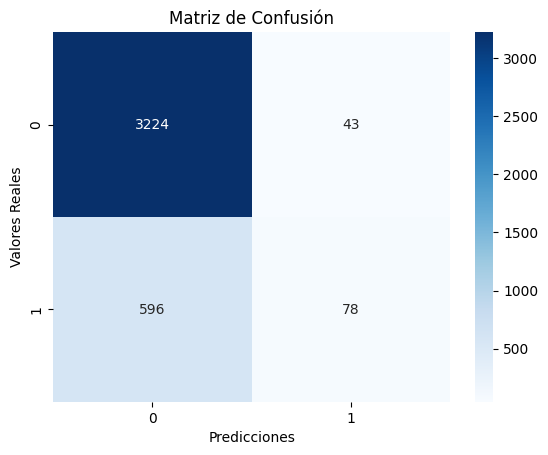

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(churn_predictions['actual_value'], churn_predictions['predicted_value'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(churn_predictions['actual_value'], churn_predictions['predicted_value'])
acc_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8378584115706673